In [64]:
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
# Define the file path
file_path = 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_PD\\Ramsey_qudit_WaitTime0us_d=3_Cal_False_U1only_False_0_20241126_1116.txt'

# Function to parse the filename
def parse_filename(filename):
    pattern = r'us_(\d{8})_(\d{4})\.txt'
    match = re.search(pattern, filename)
    if match:
        date_str_ = match.group(1) + match.group(2)
        date_str = match.group(1) + '_' + match.group(2)
        date_time = datetime.strptime(date_str_, '%Y%m%d%H%M')
        return date_str,date_time
    else:
        return None, None

# Function to check if a line is a data line
def is_data_line(line):
    # A data line should be two numeric values separated by a comma
    parts = line.split(',')
    if len(parts) != 2:
        return False
    try:
        float(parts[0].strip())
        float(parts[1].strip())
        return True
    except ValueError:
        return False

# Function to read the file and extract data
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filename from the last line
    raw_data_filename = lines[-1].strip()
    pi_times = lines[-3].strip()
    freqs = lines[-4].strip()
    # Extract data lines until we find a line that is not a data line
    data = []
    for line in lines:
        if is_data_line(line):
            data.append(line.strip().split(','))
        else:
            break
    
    return data, raw_data_filename,pi_times, freqs

# Parse the filename
filename = file_path.split('/')[-1]
date_str,date_time = parse_filename(filename)

# Extract data from the file
data, raw_data_filename,pi_times,freqs = extract_data(file_path)


print(f"Date and Time: {date_str,date_time}")
print("Extracted Data (first few lines):")
times_exp = []

for row in data:
    times_exp.append(float(row[0]))
print(len(times_exp))
# print(times_exp)
print(pi_times)
print(freqs)
print(f"Raw Data Filename: {raw_data_filename}")
print(len(raw_data_filename))

Date and Time: (None, None)
Extracted Data (first few lines):
21
[[-2, 3, -3], [-2, 4, -4]]
[0.5, 0.3333333333333333]
Raw Data Filename: ['qudit_ramsey_scan_bused_1203', 'qudit_ramsey_scan_bused_1204', 'qudit_ramsey_scan_bused_1205', 'qudit_ramsey_scan_bused_1206', 'qudit_ramsey_scan_bused_1207', 'qudit_ramsey_scan_bused_1208', 'qudit_ramsey_scan_bused_1209', 'qudit_ramsey_scan_bused_1210', 'qudit_ramsey_scan_bused_1211', 'qudit_ramsey_scan_bused_1212', 'qudit_ramsey_scan_bused_1213', 'qudit_ramsey_scan_bused_1214', 'qudit_ramsey_scan_bused_1215', 'qudit_ramsey_scan_bused_1216', 'qudit_ramsey_scan_bused_1217', 'qudit_ramsey_scan_bused_1218', 'qudit_ramsey_scan_bused_1219', 'qudit_ramsey_scan_bused_1220', 'qudit_ramsey_scan_bused_1221', 'qudit_ramsey_scan_bused_1222', 'qudit_ramsey_scan_bused_1223']
672


In [66]:
# import numpy as np
# import matplotlib.pyplot as plt
# import glob
# import json

# pattern = f'qudit_ramsey_scan_dimension3_*'
# matching_files = glob.glob(pattern)
# raw_data_filenames = matching_files[-13:-1]
# print(len(raw_data_filename))

In [68]:
import re
from datetime import datetime

# Define the file path
file_path = file_path

# Function to parse the filename
def parse_filename(filename):
    pattern = r'_(Dimension)_(\d+)_(\d{8})_(\d{4})\.txt'
    match = re.search(pattern, filename)
    if match:
        dimension = int(match.group(2))
        date_str = match.group(3) + match.group(4)
        date_time = datetime.strptime(date_str, '%Y%m%d%H%M')
        return dimension, date_time
    else:
        return None, None

# Function to check if a line is a data line
def is_data_line(line):
    # A data line should be two numeric values separated by a comma
    parts = line.split(',')
    if len(parts) != 2:
        return False
    try:
        float(parts[0].strip())
        float(parts[1].strip())
        return True
    except ValueError:
        return False

# Function to read the file and extract data
def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filenames from the last line and convert to a list
    raw_data_filenames_line = lines[-1].strip()
    raw_data_filenames = [name.strip().strip("'\"") for name in raw_data_filenames_line.strip('[]').split(',')]
    
    # Extract data lines until we find a line that is not a data line
    data = []
    for line in lines:
        if is_data_line(line):
            data.append(line.strip().split(','))
        else:
            break
    
    return data, raw_data_filenames

# Parse the filename
filename = file_path.split('/')[-1]
dimension, date_time = parse_filename(filename)

# Extract data from the file
num_data, raw_data_filenames = extract_data(file_path)

# Output the results
print(f"Dimensions: {dimension}")
print(f"Date and Time: {date_time}")

# for row in num_data:
#     print(row)
# print("Raw Data Filenames:")
Z_drive_raw_data = 'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data\\'
raw_data_filepaths = []
for raw_filename in raw_data_filenames:
    print(raw_filename)
    raw_data_filepaths.append(Z_drive_raw_data+raw_filename)
print(len(raw_data_filepaths))

Dimensions: None
Date and Time: None
qudit_ramsey_scan_bused_1203
qudit_ramsey_scan_bused_1204
qudit_ramsey_scan_bused_1205
qudit_ramsey_scan_bused_1206
qudit_ramsey_scan_bused_1207
qudit_ramsey_scan_bused_1208
qudit_ramsey_scan_bused_1209
qudit_ramsey_scan_bused_1210
qudit_ramsey_scan_bused_1211
qudit_ramsey_scan_bused_1212
qudit_ramsey_scan_bused_1213
qudit_ramsey_scan_bused_1214
qudit_ramsey_scan_bused_1215
qudit_ramsey_scan_bused_1216
qudit_ramsey_scan_bused_1217
qudit_ramsey_scan_bused_1218
qudit_ramsey_scan_bused_1219
qudit_ramsey_scan_bused_1220
qudit_ramsey_scan_bused_1221
qudit_ramsey_scan_bused_1222
qudit_ramsey_scan_bused_1223
21


48
0.5


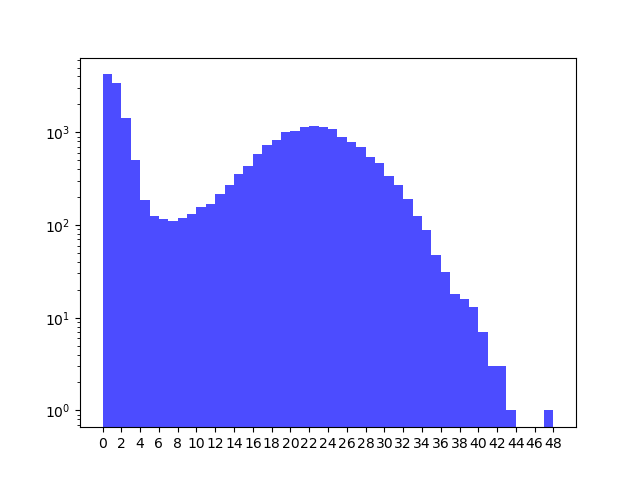

In [70]:
arrays = []
for i, name in enumerate(raw_data_filepaths):
    file_path = name
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            arrays.append(data[0]["0"])

hist_data = np.array(arrays)
flat_hist_data = hist_data.ravel()
plt.figure()
plt.hist(flat_hist_data, color='blue',bins = int(max(flat_hist_data)), alpha=0.7)
plt.xticks(np.arange(0, max(flat_hist_data)+2, 2))
plt.yscale('log')
print(max(flat_hist_data))

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    data_sorted = data_sorted[100:-100]
    if len(data_sorted) > 1000:
        data_sorted = data_sorted[0:-1: round (data_sorted.size/(len(counts)*0.0250167))]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    # data_sorted_diff = np.diff(data_sorted)
    # print(data_sorted_diff)
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max/2 + data_sorted[data_diff_maxind]
    return threshold, data_sorted
    
threshold,_ = getShelvingThreshold(flat_hist_data)
print(threshold)

In [71]:
# def monte_carlo_simulation(d, T, total_time, detunings, pi_times, bias_factor, num_iterations, noise_amplitude):
#     all_state_pops = []

#     for _ in range(num_iterations):
#         # noise = np.random.normal(-noise_amplitude, noise_amplitude, size=d)
#         state_pops, times = generate_unitary(d, T, total_time, detunings, pi_times, bias_factor, noise_amplitude)
#         all_state_pops.append(state_pops)

#     avg_state_pops = np.mean(all_state_pops, axis=0)
#     return avg_state_pops, times

# import numpy as np
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.stats as stats
# import matplotlib.pyplot as plt


# def generate_unitary(d, T, total_time, detunings, pi_times ,bias_factor, noise_amplitude):
#     # print(d)
#     Rabi_frequencyies = np.pi/(np.array(pi_times)*1e-6)
#     detunings = 2*np.pi*np.array(detunings)*1e6 
#     n_times = []
#     for n in range(0,d):
#         n_times.append(2*np.arccos(np.sqrt(((d - n) / (d + 1 - n))))/Rabi_frequencyies[n])
#     # print(n_times)
#     initial_state = np.zeros(d, dtype=complex)
#     initial_state[0] = 1
#     times = np.linspace(0, total_time, 500)
#     state_pops = []


#     def U_n(n,t,noise):
#         U = np.eye(d, dtype=complex)
#         # print(np.arccos(np.sqrt(((d - n) / (d + 1 - n))))/Rabi_frequencyies[n])
#         del_detuning = detunings[n] + noise[n]
#         time = np.arccos(np.sqrt(((d - n) / (d + 1 - n))))/Rabi_frequencyies[n]
#         # print(2*time*1e6)
#         # print(time*1e6)
#         theta = np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2)*time

#         U[0, 0] = np.cos(theta) - (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         U[n, n] = np.cos(theta) + (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         # print(np.cos(np.sqrt(Rabi_frequencyies[n]**2 + (detunings[n]+noise) **2)*np.arccos(np.sqrt(((d - n) / (d + 1 - n))))/Rabi_frequencyies[n])**2 + np.sin(np.sqrt(Rabi_frequencyies[n]**2 + (detunings[n]+noise) **2)*np.arcsin(np.sqrt((1 / (d + 1 - n))))/Rabi_frequencyies[n])**2)
#         phase = 0
        
#         U[0, n] = 1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n]/np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         U[n, 0] = 1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n]/np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         # print(U[0,0] ,U[n,0], U[n,0],U[n,n])
#         return U


#     def U_p1(d,t,noise):
#         U_p1 = np.eye(d, dtype=complex)
#         for n in range(1, d):
#             U_p1 = U_n(n,t,noise) @ U_p1

#         return(U_p1)

    
#     def U_n_wait(n,t,noise):
#         U_wait = np.eye(d, dtype=complex)
#         time = t
#         del_detuning  = detunings[n]+ noise[n] #+(0.01e6)*np.sin(180*2*np.pi*(t))
#         # print(time)
#         Rabi_frequencies_zeros = np.zeros(d)
#         theta = np.sqrt(Rabi_frequencies_zeros[n]**2 + (del_detuning) **2)*time

#         if theta != 0:
#             U_wait[0, 0] = np.cos(theta) - (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencies_zeros[n]**2 + (del_detuning) **2))
#             U_wait[n, n] = np.cos(theta) + (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencies_zeros[n]**2 + (del_detuning) **2))
#         else:
#             U_wait[0, 0] = np.cos(theta) 
#             U_wait[n, n] = np.cos(theta) 
        
#         phase = 0
#         if theta != 0:
#             U_wait[0, n] = -1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencies_zeros[n]/np.sqrt(Rabi_frequencies_zeros[n]**2 + (del_detuning) **2))
#             U_wait[n, 0] = -1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencies_zeros[n]/np.sqrt(Rabi_frequencies_zeros[n]**2 + (del_detuning) **2))
#         else:
#             U_wait[0, n] = 0
#             U_wait[n, 0] = 0
#         return U_wait
        
#     def U_wait(d,t,noise):
#         U_wait = np.eye(d,dtype = complex)
#         for n in np.flip(range(1, d)):
#             t =  2*sum(n_times[n+1:])*1e-6 + t*1e-6
#             # print(t)
#             # t = 0
#             U_wait = U_n_wait(n,t,noise) @ U_wait
#         return U_wait
    
#     def U_n_t(n, t,noise):
#         Unt = np.eye(d, dtype=complex)
#         time = np.arccos(np.sqrt(((d - n) / (d + 1 - n))))/Rabi_frequencyies[n]
#         del_detuning  = detunings[n]+ noise[n] #+(0.01e6)*np.sin(180*2*np.pi*(t*1e-6))
#         theta = np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2)*time

#         # print(t)
#         Unt[0, 0] = np.cos(theta) - (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         Unt[n, n] = np.cos(theta) + (1j*np.sin(theta) * (del_detuning) /np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         # print(abs(d-n))
#         # print(abs(d-n))
#         phase = 2 * np.pi *t /T  
        
#         Unt[0, n] = -1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n]/np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
#         Unt[n, 0] = -1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n]/np.sqrt(Rabi_frequencyies[n]**2 + (del_detuning) **2))
       
#         return Unt


#     def Ut(d,t,noise):
#         Ut = np.eye(d, dtype=complex)
#         for n in np.flip(range(1, d)):

#             Ut =  U_n_t(n, t,noise) @ Ut
#         return Ut
#     # print(Ut(3,0),"\n",U_p1(3,0))
    
#     for t in times:
#         noise = 2*np.pi*(np.random.normal(-noise_amplitude, noise_amplitude, size=d))*1e6
#         #noise = 2*np.pi*np.array(stats.cauchy.rvs(loc=0, scale=noise_amplitude, size=d))*1e6
#         final_state = Ut(d,t,noise) @ U_wait(d,t,noise)@(U_p1(d,t,noise) @ initial_state)
        
#         state_pops.append(np.abs(final_state)**2)
        
#     return np.array(state_pops), times


[291, 289, 290, 291, 288, 297, 290, 293, 294, 297, 299, 295, 296, 297, 295, 293, 292, 290, 290, 293, 294]
0 || all darks =  9 || failing first herald =  42 || failing second herald =  0 || deshelving error =  42 249 Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_ramsey_scan_bused_1203
1 || all darks =  11 || failing first herald =  60 || failing second herald =  0 || deshelving error =  60 229 Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_ramsey_scan_bused_1204
2 || all darks =  10 || failing first herald =  52 || failing second herald =  0 || deshelving error =  52 238 Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_ramsey_scan_bused_1205
3 || all darks =  9 || failing first herald =  57 || failing second herald =  0 || deshelving error =  57 234 Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_ramsey_scan_bused_1206
4 || all darks =  12 || failing first herald =  59 || failing second herald =  0 || deshelving error =  59 229 Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_rams

ValueError: 'x' and 'y' must have the same size

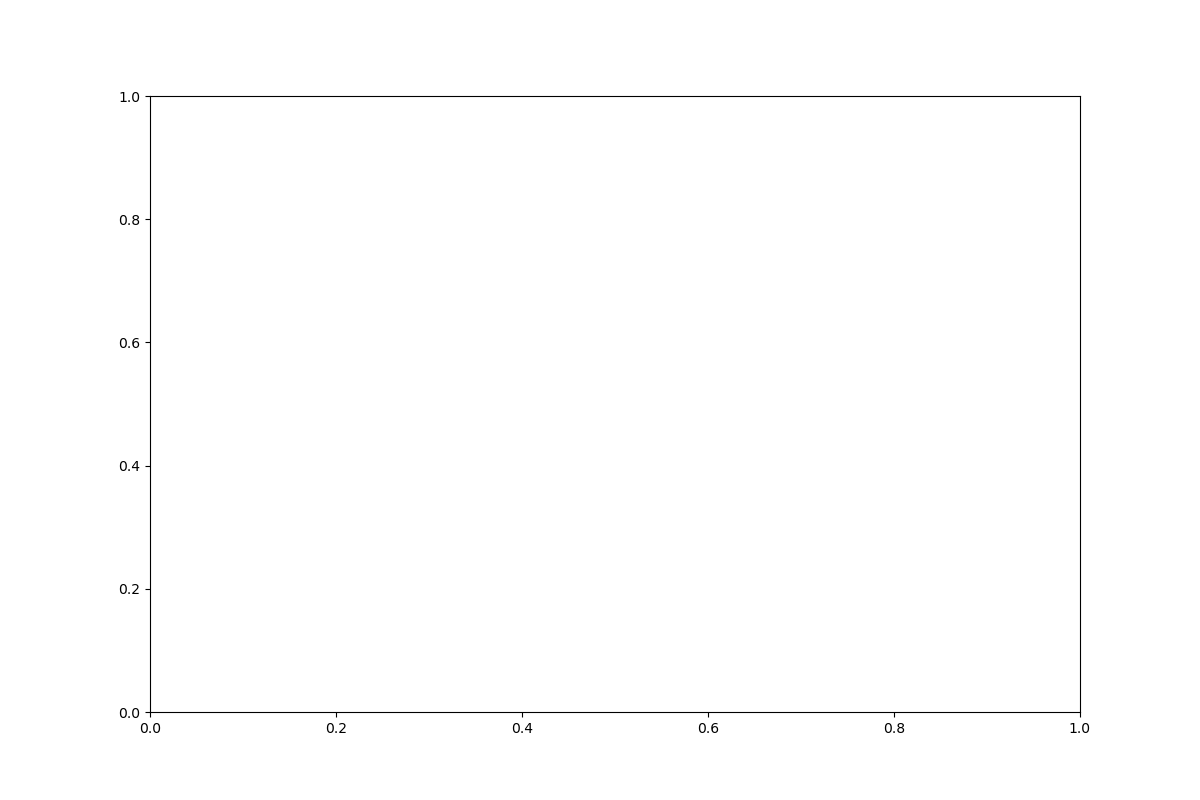

In [75]:
arrays_3d = []
for file_path in raw_data_filepaths:
    arrays = []
    with open(file_path, 'r') as file:
        # print(file_path)
        for line in file:
            data = json.loads(line)
            arrays.append(data[0]["0"][:])
    arrays_3d.append(arrays)
# print(np.array(arrays_3d).shape)
# bool_array = np.array(arrays_3d) > 4
# bool_matrix = bool_array
# result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
# # print(bool_matrix.shape)
# not_all_darks = []
# num_points = len(num_data)
# # print(num_points)
# for matrix_index in range(bool_matrix.shape[0]):
#     for row_index in range(bool_matrix.shape[1]):
#         true_indices = np.where(bool_matrix[matrix_index, row_index, :])
#         if true_indices[0].size > 0:
#             first_true_index = true_indices[0]
#             if first_true_index[0] != 0 and first_true_index[0] != 1:
#                 result_matrix[matrix_index, row_index, first_true_index[0]] = True
# print(len(result_matrix))
# filtered_data_array = []
# percentage_data_used = []
# for i in range(num_points):
#     data = result_matrix[i]
#     rows_with_any_true = data.any(axis=1)
#     filtered_data = data[rows_with_any_true]
#     filtered_data_array.append(filtered_data)
#     percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
#     print(i, data.shape[0] - filtered_data.shape[0], filtered_data.shape[0], raw_data_filenames[i])

bool_array = np.array(arrays_3d) > 7
result_matrix = np.full(bool_array.shape, False, dtype=bool)
# print(bool_array)
# Process to identify the first occurrence of shelving (True value)
not_all_darks = []
first_h = []
for matrix_index in range(bool_array.shape[0]):
    not_all_dark_counts = 0
    first_h_num = 0
    for row_index in range(bool_array.shape[1]):
        true_indices = np.where(bool_array[matrix_index, row_index, :])
        if true_indices[0].size > 0:
            first_true_index = true_indices[0]
            # print(first_true_index)
            not_all_dark_counts = not_all_dark_counts + 1
            if first_true_index[0] != 0 :
                first_h_num = first_h_num+1
                # if first_true_index[0] != 1:
                result_matrix[matrix_index, row_index, first_true_index[0]] = True
    first_h.append(first_h_num)
    not_all_darks.append(not_all_dark_counts)
# Filter data and compute percentages used
print(not_all_darks)
filtered_data_array = []
percentage_data_used = []

for i in range(num_points):
    data = result_matrix[i]
    rows_with_any_true = data.any(axis=1)
    filtered_data = data[rows_with_any_true]
    filtered_data_array.append(filtered_data)
    percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
    print(i,'|| all darks = ',data.shape[0] - not_all_darks[i],'|| failing first herald = ',not_all_darks[i] - first_h[i],'|| failing second herald = ',first_h[i] - filtered_data.shape[0],'|| deshelving error = ',np.round((not_all_darks[i] - filtered_data.shape[0]),3) , filtered_data.shape[0], raw_data_filepaths[i])
    

def find_errors(num_SD, full_data_array, exp_num):
    upper_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                   (1 + (num_SD**2 / exp_num))) + (np.sqrt(
                       ((full_data_array *
                         (1 - full_data_array) * num_SD**2) / exp_num) +
                       (num_SD**4 /
                        (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

    lower_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                   (1 + (num_SD**2 / exp_num))) - (np.sqrt(
                       ((full_data_array *
                         (1 - full_data_array) * num_SD**2) / exp_num) +
                       (num_SD**4 /
                        (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

    return lower_error, upper_error

ket_data = []
exp_num_data = []

len(filtered_data_array)
for i in filtered_data_array:
    ket_data.append(np.mean(i, axis=0))
    exp_num_data.append(len(i))
ket_data = np.array(ket_data)
exp_num_array = np.zeros(ket_data.shape)
for i in range(ket_data.shape[1]):
    exp_num_array[:,i] =  np.array(exp_num_data)


ket_data = np.array(ket_data)
lower, upper = find_errors(1, np.array(ket_data), exp_num_array)

# Calculate the error bars
yerr = [ket_data - lower, upper - ket_data]
 
# print(ket_data)
# Set figure size here
ket_data = np.array(ket_data)
print(len(ket_data))
#print((np.mean(ket_data[:,0])-1/3)*3,np.mean(ket_data[:,1]) - 1/3)*3,np.mean(ket_data[:,2])-1/3,np.mean(ket_data[:,0])+np.mean(ket_data[:,1])+np.mean(ket_data[:,2]))
avgs = np.mean(ket_data, axis = 0)
# print(3*(avgs-1/3))
# Define a color palette
# colors = plt.cm.get_cmap('tab10', len(ket_data)).colors
# Define the colors manually
colors = ['red', 'green', 'blue']
T = 100
plt.figure(figsize=(12, 8))

states = [[-2],[-2, 3, -3], [-2, 4, -4], [2, 4, 2], [1, 3, 2], [1, 2, -1], [1, 2, 2], [1, 4, -1], [0, 4, -2], [0, 3, 1], [-1, 3, 0], [1, 4, 0], [2, 4, 3], [2, 4, 4],[0,0,0]]

for i in range(len(ket_data[0]))[2:]:
    plt.errorbar(np.array(times_exp[:])/50, 
                 ket_data[:, i], 
                 yerr=[yerr[0][:, i], 
                       yerr[1][:, i]], 
                 fmt='-o', 
                 label= rf'|{i-2}⟩ - $|D_{{5/2}}, F = {states[i-2][1]}, m_F = {states[i-2][2]}\rangle$' if len(states[i-2])>1 else rf'|{i-2}⟩ - $|S_{{1/2}}, F = 2, m_F = {states[i-2][0]}\rangle$')

# times = times_exp
exp_populations = ket_data

plt.xlabel('Phase ($\pi$)')
plt.ylabel('Population')
plt.title(f'{len(ket_data[0])-2} Level Qudit phase scan')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to make room for the legendrect=[0.2, 0, 0.95, 1]
plt.savefig(f'Ramsey_{len(ket_data[0])-1}_level_Qudit_{date_str}.png', dpi=300)
plt.show()

In [45]:
%matplotlib widget

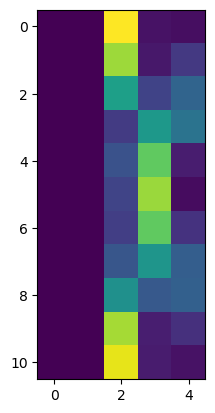

In [30]:
plt.figure()
plt.imshow(ket_data)

In [45]:
%matplotlib widget

In [47]:
x = np.zeros([5,3])
print(x.shape)
y = np.array([1,2,3,4,5])
print(x.shape[1])
for i in range(x.shape[1]):
    x[:,i] = y
z = np.zeros(x.shape)
print(x)

(5, 3)
3
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]]


In [49]:
import numpy as np
import scipy.signal as signal
import scipy.optimize as optimize
import matplotlib.pyplot as plt

# Example data
# Replace this with your actual data
# state_pops = np.array(...)  # Replace this with your data
time = np.array(times_exp)  # Time points

# Extract the ket |0⟩ population
ket_0_population = ket_data[:, 0]

# Find peaks above a certain threshold (e.g., 0.3)
threshold = 0.5
peaks, _ = signal.find_peaks(ket_0_population, height=threshold)

peaks = np.insert(peaks, 0, 0)  # Insert at the beginning
# Re-sort the array to ensure it is in ascending order
peaks = np.sort(peaks)

# Extract peak times and values
peak_times = time[peaks]
peak_values = ket_0_population[peaks]
print(peak_times,peak_values)
# Plot the data and the detected peaks
# plt.figure(figsize=(10, 6))
# plt.plot(peak_times, peak_values, 'rx', label='Detected Peaks')
# plt.show()
# Define the exponential decay function
def exponential_decay(t, A, tau):
    return A * np.exp(-t / tau) + (1/3)

def sigmoid(t, L, k, t0,c):
    return L / (1 + np.exp(k * (t - t0)))+c


# Fit the exponential decay to the peak values
params, params_cov = optimize.curve_fit(exponential_decay, peak_times, peak_values, p0=[1, 1600])
#popt, pcov = optimize.curve_fit(sigmoid, peak_times, peak_values, p0=[1, 0.0001, 600,0.333])

# Extract the fitted parameters
A_fit, tau_fit = params
#L_fit, k_fit, t0_fit,c_fit = popt

# Plot the fit
plt.figure(figsize=(10, 6))
plt.plot(time, ket_0_population, label='Ket |0⟩ Population (from Experiment)')
plt.plot(peak_times, exponential_decay(peak_times, *params), 'g--', label=f'Exponential Fit: $T_2^* = {tau_fit:.2f}$')
plt.plot(peak_times, peak_values, 'rx', label='Detected Peaks')
plt.xlabel('Wait Time ($\\mu s $)')
plt.ylabel('Ket |0⟩ Population')
plt.legend()
plt.title('Exponential Fit to Peak Amplitudes of $|0\\rangle$')
plt.savefig(f'Exponetial_decay_fit_exp_data_qutrit.png', dpi=400)
plt.show()

def sigmoid(t, A,tau,c):
    return  A * np.exp(-t**2 / tau) + c

# Fit the sigmoid function to the peak values
popt, pcov = optimize.curve_fit(sigmoid, peak_times, peak_values, p0=[2/3, 4900, 1/3])

# Extract the fitted parameters
A_fit,  t0_fit, c0_fit = popt

# Plot the fit
plt.figure(figsize=(10, 6))
plt.plot(time, ket_0_population, label='Ket |0⟩ Population (from Experiment)')
plt.plot(peak_times, sigmoid(peak_times, *popt), 'g--', label=f'Gaussian Fit: t0 = {np.sqrt(t0_fit):.2f}')
plt.plot(peak_times, peak_values, 'rx', label='Detected Peaks')
plt.xlabel('Time')
plt.ylabel('Ket |0⟩ Population')
plt.legend()
plt.title('Gaussian Fit to Peak Amplitudes of $|0\\rangle$')
plt.savefig(f'Gaussian_fit_exp_data_qutrit.png', dpi=400)
plt.show()

# Print the fitted coherence time
print(f'Fitted T2* Time: {tau_fit:.2f}')


[0.] [0.]


TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import json

# Assuming generate_unitary is defined elsewhere and imported here
# from your_module import generate_unitary

# Your existing code for loading and processing data
arrays_3d = []
for file_path in raw_data_filepaths:
    arrays = []
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            arrays.append(data[0]["0"][:])
    arrays_3d.append(arrays)

bool_array = np.array(arrays_3d) > 7.5
bool_matrix = bool_array
result_matrix = np.full(bool_matrix.shape, False, dtype=bool)

not_all_darks = []
num_points = len(num_data)

for matrix_index in range(bool_matrix.shape[0]):
    for row_index in range(bool_matrix.shape[1]):
        true_indices = np.where(bool_matrix[matrix_index, row_index, :])
        if true_indices[0].size > 0:
            first_true_index = true_indices[0]
            result_matrix[matrix_index, row_index, first_true_index[0]] = True

filtered_data_array = []
percentage_data_used = []

for i in range(num_points):
    data = result_matrix[i]
    rows_with_any_true = data.any(axis=1)
    filtered_data = data[rows_with_any_true]
    filtered_data_array.append(filtered_data)
    percentage_data_used.append(filtered_data.shape[0] / data.shape[0])

ket_data = []

for i in filtered_data_array:
    ket_data.append(np.mean(i, axis=0))

ket_data = np.array(ket_data)
exp_populations = ket_data[:50]
times_exp = np.array(times_exp[:50])  # Assuming times_exp is defined elsewhere

d = 3  # Number of levels
T = 200
total_time = 630
bias_factor = [0.0, 0.00, 0.00]
pi_times = [100, 128.017, 67.57]
initial_detunings = [0.0006, 0.0004]
num_iterations = 1  # Number of Monte Carlo iterations
noise_amplitude = 0.0001  # Noise amplitude

# Define the objective function for optimization
def objective_function(detunings):
    # print('ran)
    state_pops, times = monte_carlo_simulation(d, T, total_time, detunings, pi_times, bias_factor, num_iterations, noise_amplitude)
    sim_populations = np.abs(state_pops)**2

    # Interpolate each column independently
    sim_populations_interp = np.zeros_like(exp_populations)
    for i in range(sim_populations.shape[1]):
        sim_populations_interp[:, i] = np.interp(times_exp, times, sim_populations[:, i])

    error = np.sum((exp_populations - sim_populations_interp)**2)
    return error

# Perform Monte Carlo simulation
def monte_carlo_simulation(d, T, total_time, detunings, pi_times, bias_factor, num_iterations, noise_amplitude):
    all_state_pops = []

    for _ in range(num_iterations):
        noise = np.random.normal(0, noise_amplitude, size=d)
        state_pops, times = generate_unitary(d, T, total_time, detunings, pi_times, bias_factor, noise)
        all_state_pops.append(state_pops)

    avg_state_pops = np.mean(all_state_pops, axis=0)
    return avg_state_pops, times

# Modify generate_unitary to accept noise as an argument
def generate_unitary(d, T, total_time, detunings, pi_times, bias_factor, noise):
    Rabi_frequencyies = np.pi / (np.array(pi_times) * 1e-6)
    detunings = 2 * np.pi * np.array([0] + list(detunings)) * 1e6 + 2*np.pi*np.array(noise)
    n_times = [2 * np.arccos(np.sqrt(((d - n) / (d + 1 - n)))) / Rabi_frequencyies[n] for n in range(d)]

    initial_state = np.zeros(d, dtype=complex)
    initial_state[0] = 1
    times = np.linspace(0, total_time, 500)
    state_pops = []

    def U_n(n, t):
        U = np.eye(d, dtype=complex)
        time = np.arccos(np.sqrt(((d - n) / (d + 1 - n)))) / Rabi_frequencyies[n]
        theta = np.sqrt(Rabi_frequencyies[n] ** 2 + (detunings[n]) ** 2) * time
        U[0, 0] = np.cos(theta) - (1j * np.sin(theta) * (detunings[n]) / np.sqrt(Rabi_frequencyies[n] ** 2 + (detunings[n]) ** 2))
        U[n, n] = np.cos(theta) + (1j * np.sin(theta) * (detunings[n]) / np.sqrt(Rabi_frequencyies[n] ** 2 + (detunings[n]) ** 2))
        phase = 0
        U[0, n] = 1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n] / np.sqrt(Rabi_frequencyies[n] ** 2 + (detunings[n]) ** 2))
        U[n, 0] = 1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n] / np.sqrt(Rabi_frequencyies[n] ** 2 + (detunings[n]) ** 2))
        return U

    def U_p1(d, t):
        U_p1 = np.eye(d, dtype=complex)
        for n in range(1, d):
            U_p1 = U_n(n, t) @ U_p1
        return U_p1

    def U_n_wait(n, t):
        U_wait = np.eye(d, dtype=complex)
        time = t
        del_detuning = detunings[n]
        Rabi_frequencies_zeros = np.zeros(d)
        theta = np.sqrt(Rabi_frequencies_zeros[n] ** 2 + (del_detuning) ** 2) * time

        if theta != 0:
            U_wait[0, 0] = np.cos(theta) - (1j * np.sin(theta) * (del_detuning) / np.sqrt(Rabi_frequencies_zeros[n] ** 2 + (del_detuning) ** 2))
            U_wait[n, n] = np.cos(theta) + (1j * np.sin(theta) * (del_detuning) / np.sqrt(Rabi_frequencies_zeros[n] ** 2 + (del_detuning) ** 2))
        else:
            U_wait[0, 0] = np.cos(theta)
            U_wait[n, n] = np.cos(theta)

        phase = 0
        if theta != 0:
            U_wait[0, n] = -1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencies_zeros[n] / np.sqrt(Rabi_frequencies_zeros[n] ** 2 + (del_detuning) ** 2))
            U_wait[n, 0] = -1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencies_zeros[n] / np.sqrt(Rabi_frequencies_zeros[n] ** 2 + (del_detuning) ** 2))
        else:
            U_wait[0, n] = 0
            U_wait[n, 0] = 0
        return U_wait

    def U_wait(d, t):
        U_wait = np.eye(d, dtype=complex)
        for n in np.flip(range(1, d)):
            t = 2 * sum(n_times[n+1:]) * 1e-6 + t * 1e-6
            U_wait = U_n_wait(n, t) @ U_wait
        return U_wait

    def U_n_t(n, t):
        Unt = np.eye(d, dtype=complex)
        time = np.arccos(np.sqrt(((d - n) / (d + 1 - n)))) / Rabi_frequencyies[n]
        del_detuning = detunings[n]
        theta = np.sqrt(Rabi_frequencyies[n] ** 2 + (del_detuning) ** 2) * time
        Unt[0, 0] = np.cos(theta) - (1j * np.sin(theta) * (del_detuning) / np.sqrt(Rabi_frequencyies[n] ** 2 + (del_detuning) ** 2))
        Unt[n, n] = np.cos(theta) + (1j * np.sin(theta) * (del_detuning) / np.sqrt(Rabi_frequencyies[n] ** 2 + (del_detuning) ** 2))
        phase = 2 * np.pi * t / T
        Unt[0, n] = -1j * np.exp(-1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n] / np.sqrt(Rabi_frequencyies[n] ** 2 + (del_detuning) ** 2))
        Unt[n, 0] = -1j * np.exp(+1j * n * phase) * np.sin(theta) * (Rabi_frequencyies[n] / np.sqrt(Rabi_frequencyies[n] ** 2 + (del_detuning) ** 2))
        return Unt

    def Ut(d, t):
        Ut = np.eye(d, dtype=complex)
        for n in np.flip(range(1, d)):
            Ut = U_n_t(n, t) @ Ut
        return Ut

    for t in times:
        final_state = Ut(d, t) @ U_wait(d, t) @ (U_p1(d, t) @ initial_state)
        state_pops.append(final_state)

    return np.array(state_pops), times

# Run the optimization
result = minimize(objective_function, initial_detunings, method='Nelder-Mead')
optimized_detunings = result.x
print(optimized_detunings)
# Generate theprint() optimized unitary with noise simulation
# optimized_state_pops, times = monte_carlo_simulation(d, T, total_time, optimized_detunings, pi_times, bias_factor, num_iterations, noise_amplitude)
# sim_populations = np.abs(optimized_state_pops)**2

# Plot the results
for i in range(d):
    # plt.plot(times, sim_populations[:, i], label=f'Simulated State {i}')
    plt.plot(times_exp, exp_populations[:, i], label=f'Experimental State {i}')

plt.xlabel('Time (μs)')
plt.ylabel('Population')
plt.legend()
plt.show()


In [ ]:
plt.imshow(ket_data)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
num_states = 4
def generate_unitary_with_deltas(d, num_states, T, total_time, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state_number, del_1, del_2, times_exp):
    detunnings_U1 = [0, del_1, del_2]
    detunnings_U2 = [del_2, del_1, 0]
    state_pops, times = generate_unitary(d, num_states, T, total_time, detunnings_U1, detunnings_U2, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state)
    state_pops_interp = np.interp(times_exp, times, np.abs(state_pops[:, 0])**2)  # Assuming you want to fit to the population of state |0⟩
    return state_pops_interp

# Example usage to get the populations at experimental times:
state_pops_at_exp_times = generate_unitary_with_deltas(d, num_states, T, total_time, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state, del_1, del_2, times_exp)


NameError: name 'pi_times_U1' is not defined

In [37]:
# Define a wrapper function for curve fitting
def model_to_fit(times_exp, del_1, del_2):
    return generate_unitary_with_deltas(d, num_states, T, total_time, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state, del_1, del_2, times_exp)
exp_populations = ket_data

# Perform the curve fit
initial_guess = [0.0, -0.0025]  # Initial guess for del_1 and del_2
params_opt, params_cov = curve_fit(model_to_fit, times_exp, exp_populations[:,0], p0=initial_guess)

# Extract fitted parameters
fitted_del_1, fitted_del_2 = params_opt
print(f"Fitted del_1: {fitted_del_1}, Fitted del_2: {fitted_del_2}")

# Generate fitted populations using the optimized parameters
fitted_populations = model_to_fit(times_exp, fitted_del_1, fitted_del_2)

# Plot the experimental data and fitted curve
plt.figure(figsize=(10, 6))
plt.plot(times_exp, exp_populations[:,0], 'o', label='Experimental Data')
plt.plot(times_exp, fitted_populations, '-', label='Fitted Curve')
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population')
plt.legend()
plt.show()


NameError: name 'num_states' is not defined

In [74]:
def generate_unitary_with_deltas(d, num_states, T, total_time, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state_number, del_1, del_2, times_exp):
    detunnings_U1 = [0, del_1, del_2]
    detunnings_U2 = [del_2, del_1, 0]
    state_pops, times = generate_unitary(d, num_states, T, total_time, detunnings_U1, detunnings_U2, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state_number)
    state_pops_interp = np.array([np.interp(times_exp, times, np.abs(state_pops[:, i])**2) for i in range(state_pops.shape[1])])
    return state_pops_interp.T


[0.+1.j 0.+0.j 0.+0.j]
[-0.54486-0.21601j  0.     -0.57735j  0.     -0.56845j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.54486-0.21601j  0.     -0.57735j -0.     -0.56845j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.54486-0.21601j  0.     -0.57735j  0.     -0.56845j]
[0.+1.j 0.+0.j 0.+0.j]
[0.01996-0.63615j 0.     -0.51354j 0.45753-0.3491j ]
[0.+1.j 0.+0.j 0.+0.j]
[0.01996-0.63615j 0.     -0.51354j 0.45753-0.3491j ]
[0.+1.j 0.+0.j 0.+0.j]
[0.01996-0.63615j 0.     -0.51354j 0.45753-0.3491j ]
[0.+1.j 0.+0.j 0.+0.j]
[-0.57114-0.25378j  0.     -0.56477j -0.21457-0.49436j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.3244 -0.51944j  0.     -0.57121j  0.15433-0.52426j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.3244 -0.51944j  0.     -0.57121j  0.15433-0.52426j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.3244 -0.51944j  0.     -0.57121j  0.15433-0.52426j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.26123-0.55788j  0.     -0.56535j  0.21361-0.50526j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.26123-0.55788j  0.     -0.56535j  0.21361-0.50526j]
[0.+1.j 0.+0.j 0.+0.j]
[-0.26123-0.55788j  0.     -0.56535j  

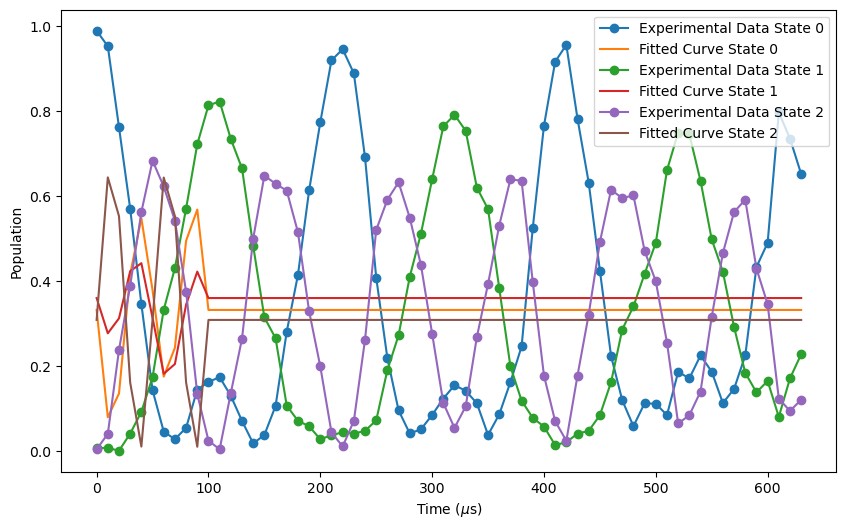

In [76]:
from scipy.optimize import curve_fit

# Define a wrapper function for curve fitting
def model_to_fit(times_exp, del_1, del_2):
    return generate_unitary_with_deltas(d, num_states, T, total_time, pi_times_U1, pi_times_U2, bias_factor, couplings_U1, couplings_U2, n_mask_list_U1, n_mask_list_U2, phase_mask, initial_state, del_1, del_2, times_exp).flatten()

# Prepare the experimental data
# times_exp = np.array([...])  # Fill this with your experimental time points
exp_populations = ket_data  # Fill this with your experimental populations corresponding to times_exp

# Flatten the experimental data for curve fitting
exp_populations_flat = exp_populations.flatten()

# Perform the curve fit
initial_guess = [0.0, -0.0025]  # Initial guess for del_1 and del_2
params_opt, params_cov = curve_fit(model_to_fit, times_exp, exp_populations_flat, p0=initial_guess)

# Extract fitted parameters
fitted_del_1, fitted_del_2 = params_opt
print(f"Fitted del_1: {fitted_del_1}, Fitted del_2: {fitted_del_2}")

# Generate fitted populations using the optimized parameters
fitted_populations_flat = model_to_fit(times_exp, fitted_del_1, fitted_del_2)
fitted_populations = fitted_populations_flat.reshape((len(times_exp), -1))

# Plot the experimental data and fitted curve
plt.figure(figsize=(10, 6))
for i in range(exp_populations.shape[1]):
    plt.plot(times_exp, exp_populations[:, i], '-o', label=f'Experimental Data State {i}')
    plt.plot(times_exp, fitted_populations[:, i], '-', label=f'Fitted Curve State {i}')
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population')
plt.legend()
plt.show()


In [381]:
x = [[-2,2,-2],[-2,1,-1],[-2,2,-2],[-2,3,-3],[0,2,-2],[0,4,-1],[0,2,-2],[0,4,-2],[-2,2,-2],[-2,4,-4],[-2,2,-2],[-2,2,-1],[0,2,-2],[0,4,0],[-2,2,-2],[-2,3,-2],[-1,2,2],[-1,4,-3],[0,-2,2],[0,4,1],[-1,2,-2],[-1,3,-1]]
len(x)
f = [1/12,     1, 1/11, 1,        1/10,       1,     1/9,      1,      1/8,      1,     1/7,      1,      1/6,      1,      1/5,       1,      1/4,        1,      1/3,     1,     1/2,       1]
len(f)

22

In [383]:
z = [[-1,2,2],[-1,4,-3],[0,-2,2],[0,4,1],[-1,2,-2],[-1,3,-1]]
z[::-1]

[[-1, 3, -1], [-1, 2, -2], [0, 4, 1], [0, -2, 2], [-1, 4, -3], [-1, 2, 2]]

In [385]:
y = []

for i in range(len(x)):
    if i % 2 !=0:
        y.append(x[i])
        

In [387]:
print([[-2,2,-2]]+ y)

[[-2, 2, -2], [-2, 1, -1], [-2, 3, -3], [0, 4, -1], [0, 4, -2], [-2, 4, -4], [-2, 2, -1], [0, 4, 0], [-2, 3, -2], [-1, 4, -3], [0, 4, 1], [-1, 3, -1]]


In [225]:
len([0,8,0,0,7,0,0,6,0,0,5,0,0,4,0,0,3,0,0,2,0,0,1,0])

24

In [227]:
len([[-2,3,-2],[-2,2,-2],[-2,3,-2],[0,4,0],[0,2,-2],[0,4,0],[-2,2,-1],[-2,2,-2],[-2,2,-1],[-2,4,-4],[-2,2,-2],[-2,4,-4],[0,4,-2],[0,2,-2],[0,4,-2],[0,4,-1],[0,2,-2],[0,4,-1],[-2,3,-3],[-2,2,-2],[-2,3,-3],[-2,1,-1],[-2,2,-2],[-2,1,-1]])

24

In [229]:
len([[-2,2,-2],[-2,1,-1],[-2,2,-2],[-2,3,-3],[0,2,-2],[0,4,-1],[0,2,-2],[0,4,-2],[-2,2,-2],[-2,4,-4],[-2,2,-2],[-2,2,-1],[0,2,-2],[0,4,0],[-2,2,-2],[-2,3,-2]])

16

In [231]:
len([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

16

In [235]:
len([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

24

In [389]:
fractions_U1 =       [1/12, 1, 1/11, 1, 1/10, 1, 1/9, 1, 1/8, 1, 1/7,      1,      1/6,      1,      1/5,       1,      1/4,        1,      1/3,     1,     1/2,       1]


In [393]:
len(fractions_U1)

22

In [401]:

pulse_train_U2 = [[-1,3,-1],[-1,2,-2],[-1,3,-1],[0,4,1],[0,-2,2],[0,4,1],[-1,4,-3],[-1,2, 2],[-1,4,-3],[-2,3,-2],[-2,2,-2],[-2,3,-2],[0,4,0],[0,2,-2],[0,4,0],[-2,2,-1],[-2,2,-2],[-2,2,-1],[-2,4,-4],[-2,2,-2],[-2,4,-4],[0,4,-2],[0,2,-2],[0,4,-2],[0,4,-1],[0,2,-2],[0,4,-1],[-2,3,-3],[-2,2,-2],[-2,3,-3],[-2,1,-1],[-2,2,-2],[-2,1,-1]]
fractions_U2 =       [1,      1/2,      1,        1,      1/3,     1,        1,      1/4,       1,         1,       1/5,        1,      1,       1/6,     1,        1,      1/7,      1,       1,       1/8,       1,        1,          1/9,      1,    1,    1/10,    1,    1,    1/11,    1,    1,    1/12,    1]